# Elevation, time, and declination

Compute the RA of a source that culminates at the default time of the observation simulations run by RASCIL. 

Compute the time that a source is above the 15 degrees threshold depending on its declination.

In [4]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from matplotlib import cm
import matplotlib as mpl

In [5]:
mpl.rc('figure', figsize=(6.64, 6.64*0.74), dpi=100)
mpl.rc('figure.subplot', left=0.15, right=0.95, bottom=0.15, top=0.92)
mpl.rc('lines', linewidth=1.75, markersize=8.0, markeredgewidth=0.75)
# mpl.rc('font', size=18.0, family="serif", serif="CM")
mpl.rc('font', size=18.0)
mpl.rc('xtick', labelsize='small')
mpl.rc('ytick', labelsize='small')
mpl.rc('xtick.major', width=1.0, size=8)
mpl.rc('ytick.major', width=1.0, size=8)
mpl.rc('xtick.minor', width=1.0, size=4)
mpl.rc('ytick.minor', width=1.0, size=4)
mpl.rc('axes', linewidth=1.5)
mpl.rc('legend', fontsize='small', numpoints=1, labelspacing=0.4, frameon=False)
mpl.rc('text', usetex=True)
mpl.rc('savefig', dpi=300)

In [6]:
mid_location = EarthLocation(lon=21.443803 * u.deg, lat=-30.712925 * u.deg, height=1053.000000)
utc_time = Time("2000-01-01T00:00:00", format="isot", scale="utc")

A source with a RA of 121.405354 culminates at the default time of simulation 2000-01-01T00:00:00

In [7]:
test_source = SkyCoord(ra=121.405354* u.deg, dec=-30.712925 * u.deg)
source_altaz = test_source.transform_to(AltAz(obstime=utc_time,location=mid_location))
print(f"RA = {test_source.ra.deg:.7f} Altitude = {source_altaz.alt:.7f}")

RA = 121.4053540 Altitude = 89.9997389 deg


In [8]:
decs = np.linspace(-30.712925 + 90 - 15, -90, 101)
time_over_15 = np.zeros_like(decs)
for i, dec in enumerate(tqdm(decs)):
    source = SkyCoord(ra=121.405354* u.deg, dec=dec * u.deg)
    source_altaz = source.transform_to(
        AltAz(obstime=utc_time + np.linspace(-12, 12, 24*100+1) * u.hour,location=mid_location))
    time_over_15[i] = np.sum(source_altaz.alt.deg > 15)/100

100%|██████████| 101/101 [00:19<00:00,  5.18it/s]


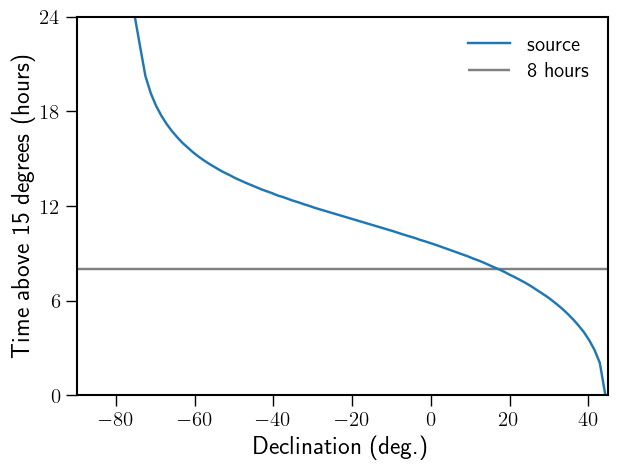

In [15]:
plt.plot(decs, time_over_15, label="source")

plt.hlines(8, -90, 45, label="8 hours", color="0.5", )

plt.ylabel("Time above 15 degrees (hours)")
plt.xlabel("Declination (deg.)")
plt.ylim([0,24])
plt.xlim([-90, 45])
plt.yticks([0, 6, 12, 18, 24])
plt.legend()

plt.savefig("time_vs_dec.png")